<a href="https://colab.research.google.com/github/baeguk/RedeNeuralEx1Sigmoid/blob/main/SIGMOIDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

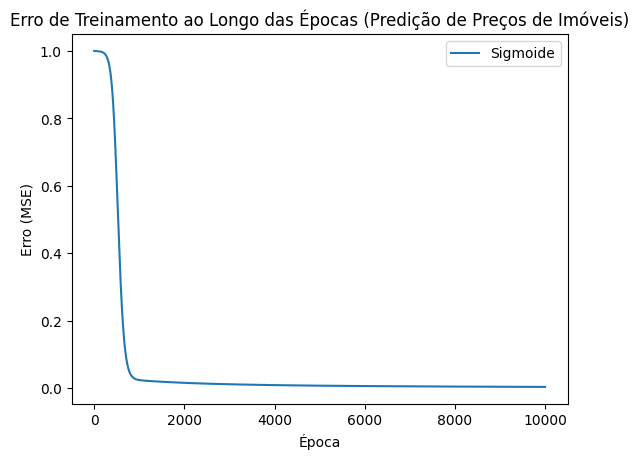


Resultados da rede neural com Sigmoide (todas as entradas):
Entrada: [50  1  1], Preço Previsto: 345.50, Preço Real: 200.00
Entrada: [70  2  1], Preço Previsto: 376.96, Preço Real: 300.00
Entrada: [90  2  2], Preço Previsto: 410.51, Preço Real: 400.00
Entrada: [120   3   2], Preço Previsto: 480.05, Preço Real: 500.00
Entrada: [150   4   3], Preço Previsto: 607.97, Preço Real: 600.00
Entrada: [200   5   4], Preço Previsto: 809.94, Preço Real: 800.00
Entrada: [250   6   5], Preço Previsto: 991.05, Preço Real: 1000.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Funções de Ativação
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Derivadas das Funções de Ativação
def derivada_sigmoide(x):
    sig = sigmoide(x)
    return sig * (1 - sig)

# Conjunto de Dados: [Área em Metro Quadrado, Quartos, Banheiros]
X = np.array([
    [50, 1, 1],
    [70, 2, 1],
    [90, 2, 2],
    [120, 3, 2],
    [150, 4, 3],
    [200, 5, 4],
    [250, 6, 5]
])

# Preços Alvo (em milhares BRL)
y = np.array([
    [200],
    [300],
    [400],
    [500],
    [600],
    [800],
    [1000]
])

# Divisão dos Dados em Treinamento e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos Dados
normalizador_X = StandardScaler()
normalizador_y = StandardScaler()

X_treino = normalizador_X.fit_transform(X_treino)
X_teste = normalizador_X.transform(X_teste)

y_treino = normalizador_y.fit_transform(y_treino)
y_teste = normalizador_y.transform(y_teste)

# Hiperparâmetros
taxa_aprendizado = 0.01
epocas = 10000
tamanho_entrada = X_treino.shape[1]  # Número de características
tamanho_oculto = 5  # Neurônios na camada oculta
tamanho_saida = 1  # Saída única (regressão)

# Função para treinar uma rede neural
def treinar_rede_neural(funcao_ativacao, derivada_ativacao):
    np.random.seed(42)
    pesos_entrada_oculta = np.random.randn(tamanho_entrada, tamanho_oculto) * 0.01
    viés_oculta = np.zeros(tamanho_oculto)
    pesos_oculta_saida = np.random.randn(tamanho_oculto, tamanho_saida) * 0.01
    viés_saida = np.zeros(tamanho_saida)

    erros = []
    for epoca in range(epocas):
        # Passagem Direta
        entrada_oculta = np.dot(X_treino, pesos_entrada_oculta) + viés_oculta
        saida_oculta = funcao_ativacao(entrada_oculta)

        entrada_final = np.dot(saida_oculta, pesos_oculta_saida) + viés_saida
        saida_final = entrada_final  # Sem ativação na camada final (regressão)

        # Calcular Erro
        erro = y_treino - saida_final
        erros.append(np.mean(np.square(erro)))

        # Retropropagação
        d_erro = -2 * erro / len(X_treino)
        gradiente_saida = d_erro

        d_oculta = np.dot(gradiente_saida, pesos_oculta_saida.T) * derivada_ativacao(entrada_oculta)

        # Atualizar Pesos e Viéses
        pesos_oculta_saida -= taxa_aprendizado * np.dot(saida_oculta.T, gradiente_saida)
        viés_saida -= taxa_aprendizado * np.sum(gradiente_saida, axis=0)

        pesos_entrada_oculta -= taxa_aprendizado * np.dot(X_treino.T, d_oculta)
        viés_oculta -= taxa_aprendizado * np.sum(d_oculta, axis=0)

    return erros, pesos_entrada_oculta, viés_oculta, pesos_oculta_saida, viés_saida

# Treinar Redes Neurais - Sigmoide
erros_sigmoide, pesos_entrada_oculta_sigmoide, viés_oculta_sigmoide, pesos_oculta_saida_sigmoide, viés_saida_sigmoide = treinar_rede_neural(sigmoide, derivada_sigmoide)

# Gráfico dos Erros de Treinamento
plt.plot(range(epocas), erros_sigmoide, label="Sigmoide")
plt.title("Erro de Treinamento ao Longo das Épocas (Predição de Preços de Imóveis)")
plt.xlabel("Época")
plt.ylabel("Erro (MSE)")
plt.legend()
plt.show()

# Teste da rede neural com todas as entradas - Sigmoide
print("\nResultados da rede neural com Sigmoide (todas as entradas):")
for i in range(len(X)):
    entrada_oculta = np.dot(normalizador_X.transform(X[i].reshape(1, -1)), pesos_entrada_oculta_sigmoide) + viés_oculta_sigmoide
    saida_oculta = sigmoide(entrada_oculta)

    entrada_final = np.dot(saida_oculta, pesos_oculta_saida_sigmoide) + viés_saida_sigmoide
    preco_previsto = normalizador_y.inverse_transform(entrada_final.reshape(-1, 1))

    preco_real = y[i]

    print(f"Entrada: {X[i]}, "
          f"Preço Previsto: {preco_previsto[0][0]:.2f}, "
          f"Preço Real: {preco_real[0]:.2f}")